In [7]:
!pip3 install pandas

  Using cached https://files.pythonhosted.org/packages/e6/de/a0d3defd8f338eaf53ef716e40ef6d6c277c35d50e09b586e170169cdf0d/pandas-0.24.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/35/d5/4f8410ac303e690144f0a0603c4b8fd3b986feb2749c435f7cdbb288f17e/numpy-1.16.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/61/28/1d3920e4d1d50b19bc5d24398a7cd85cc7b9a75a490570d5a30c57622d34/pytz-2018.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl


In [8]:
from utils import *
from preprocessing import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [2]:
def get_numeric_cols(df):
    df_cols = list(df.columns.values)
    non_numeric_cols = ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 
                           'clean_text']
    #create a list of numeric_cols
    numeric_cols = [col for col in df_cols if col not in non_numeric_cols]
    return numeric_cols


def standardize_feats(df_train, df_test):
    ss = StandardScaler()
    numeric_cols = get_numeric_cols(df_train)
    for col in numeric_cols:
        df_train[col] = df_train[col].fillna(0)
        df_test[col] = df_test[col].fillna(0)
        
        ss.fit(df_train[col].values.reshape(-1,1))
        df_train[col] = ss.transform(df_train[col].values.reshape(-1,1))
        df_test[col] = ss.transform(df_test[col].values.reshape(-1,1))
    return df_train, df_test


In [18]:
input_dir = 'Data/'

# Process whole train data
print('Pre Processing train data')
with Timer("Preprocess train data"):
    df_train = pd.read_csv(input_dir + 'train.csv')
    print('Shape of train before pre-processing is {}'.format(df_train.shape))
    df_train = execute_pre_process(df_train)
    
# Process test data
print('Pre processing test data')
with Timer("Preprocess test data"):
    df_test = pd.read_csv(input_dir + 'test.csv')
    print('Shape of test before pre-processing is {}'.format(df_test.shape))
    df_test = execute_pre_process(df_test)
    

Pre Processing train data
Preprocess train data...
Shape of train before pre-processing is (159571, 8)
Preprocess train data: cpu 105.87, time 105.87

Pre processing test data
Preprocess test data...
Shape of test before pre-processing is (153164, 2)
Preprocess test data: cpu 99.18, time 99.18



In [19]:
#make a copy of dt_train to do EDA on some of the new features that were created
df_eda = df_train.copy()

In [20]:
#standardize numeric cols (mean centering)
df_train, df_test = standardize_feats(df_train, df_test)
df_train.to_csv(input_dir + 'train_processed_stage1.csv', index=False)
df_test.to_csv(input_dir + 'test_processed_stage1.csv', index=False)

d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validati

In [21]:
#get columns of new features
new_feature_col_names = list(df_eda.columns.values)[9:]
new_feature_col_names

['total_length',
 'capitals',
 'caps_vs_length',
 'num_exclamation_marks',
 'num_question_marks',
 'num_punctuation',
 'num_symbols',
 'num_words',
 'num_unique_words',
 'words_vs_unique',
 'num_smilies',
 'ant_slash_n',
 'nb_fk',
 'nb_sk',
 'nb_dk',
 'nb_you',
 'nb_ng',
 'nb_mother',
 'start_with_columns',
 'has_timestamp',
 'has_date_long',
 'has_date_short',
 'has_http',
 'has_mail',
 'has_image',
 'has_ip',
 'has_emphasize_equal',
 'has_emphasize_quotes',
 'has_star',
 'unknown_fasttext']

In [22]:
df_eda.iloc[:,2:8].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [23]:
sums_of_each_class = df_eda.iloc[:,2:8].sum()
#sum of classes across a row
sum_of_classes_across_a_row = df_eda.iloc[:,2:8].sum(axis=1)
df_eda['non_toxic']=(sum_of_classes_across_a_row==0)

d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


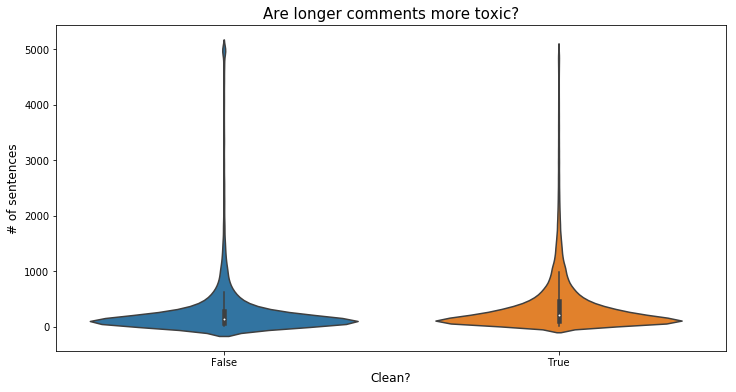

In [26]:
plt.figure(figsize=(12,6))
sns.violinplot(y='total_length',x='non_toxic', data=df_eda,split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Are longer comments more toxic?", fontsize=15)
plt.show()

__Observation:__ Looks like the length of comments does not matter to distinguish between toxic and non-toxic comments.

__Note__: Violin plot is an alternative to the traditional box plot. The inner markings show the percentiles while the width of the "violin" shows the volume of comments at that level/instance.

In [30]:
pd.melt(df_eda, value_vars=['num_words', 'num_unique_words'], id_vars='non_toxic').head()

,non_toxic,variable,value
0,True,num_words,43
1,True,num_words,17
2,True,num_words,42
3,True,num_words,113
4,True,num_words,13


In [41]:
# train_feats['count_unique_word'].loc[train_feats['count_unique_word']>200] = 200
df_eda['word_unique_percent']=df_eda['num_unique_words']*100/df_eda['num_words']
#prep for split violin plots
#For the desired plots , the data must be in long format
temp_df = pd.melt(df_eda, value_vars=['num_words', 'num_unique_words'], id_vars='non_toxic')
#spammers - comments with less than 30% unique words
spammers=df_eda[df_eda['word_unique_percent']<30]

Text(0,0.5,'Count')

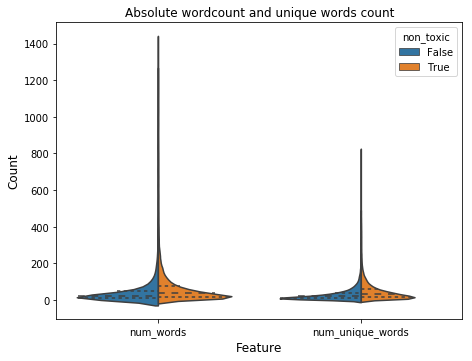

In [36]:
plt.figure(figsize=(16,12))
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.violinplot(x='variable', y='value', hue='non_toxic', data=temp_df,split=True,inner='quartile')
plt.title("Absolute wordcount and unique words count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

__Chart desc:__ This is a split violin chart. It is a variation of the traditional box chart/violin chart which allows us to split the violin in the middle based on a categorical variable.

d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Percentage unique words')

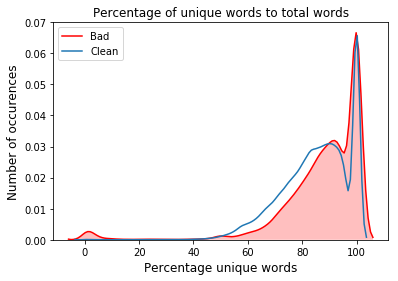

In [37]:
plt.title("Percentage of unique words to total words")
ax=sns.kdeplot(df_eda[df_eda.non_toxic == 0].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(df_eda[df_eda.non_toxic == 1].word_unique_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurences', fontsize=12)
plt.xlabel('Percentage unique words', fontsize=12)

__Observation:__ There is a bulge near the 0-10% mark indicating a large number of toxic comments containing very little variety of words.

__Chart desc:__ This is an overlay of two kernel density estimation plots of percentage of unique words out of all the words in the comment, done for both clean and toxic comments
Even though the number of clean comments dominates the dataset(~90%), there are only 75 clean comments that are spam, which makes it a powerful indicator of a toxic comment.

In [52]:
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']
spammers[cols].sum()

toxic            335.0
severe_toxic     142.0
obscene          227.0
threat            15.0
insult           194.0
identity_hate     45.0
non_toxic        128.0
dtype: float64

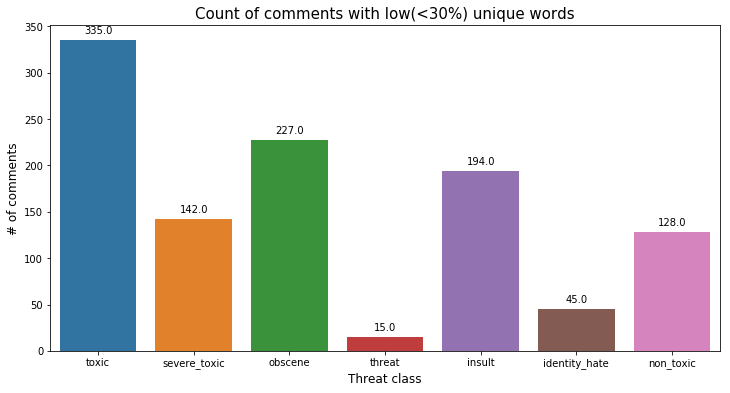

In [53]:
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']
# x=spammers.iloc[:,-7:].sum()
x = spammers[cols].sum()
plt.figure(figsize=(12,6))
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.xlabel('Threat class', fontsize=12)
plt.ylabel('# of comments', fontsize=12)
plt.show()


In [11]:
df_train[['total_length','capitals','caps_vs_length','num_exclamation_marks','num_question_marks','num_punctuation','num_symbols',
 'num_words','num_unique_words','words_vs_unique']].head()

,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,264,17,0.064394,0,1,6,0,43,41,0.953488
1,112,8,0.071429,1,0,5,0,17,17,1.000000
2,233,4,0.017167,0,0,4,0,42,39,0.928571
3,622,11,0.017685,0,0,6,0,113,82,0.725664
4,67,2,0.029851,0,1,3,0,13,13,1.000000


In [32]:
df_train[['total_length','capitals','caps_vs_length','num_exclamation_marks','num_question_marks','num_punctuation','num_symbols',
 'num_words','num_unique_words','words_vs_unique']].head()

,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,-0.220195,-0.001654,0.137572,-0.025546,0.346388,-0.154587,-0.107151,-0.244618,-0.130379,0.768235
1,-0.477509,-0.094891,0.213346,0.013065,-0.282584,-0.232894,-0.107151,-0.506634,-0.571261,1.131109
2,-0.272673,-0.136330,-0.371132,-0.025546,-0.282584,-0.311200,-0.107151,-0.254695,-0.167119,0.573838
3,0.385847,-0.063812,-0.365558,-0.025546,-0.282584,-0.154587,-0.107151,0.460811,0.622796,-1.009204
4,-0.553687,-0.157049,-0.234513,-0.025546,0.346388,-0.389507,-0.107151,-0.546945,-0.644741,1.131109


In [12]:
df_test[['total_length','capitals','caps_vs_length','num_exclamation_marks','num_question_marks','num_punctuation','num_symbols',
 'num_words','num_unique_words','words_vs_unique']].head()

,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,367,4,0.010899,0,0,11,0,72,61,0.847222
1,50,7,0.140000,0,0,2,0,12,11,0.916667
2,54,4,0.074074,0,0,0,1,12,10,0.833333
3,205,4,0.019512,0,0,5,0,38,30,0.789474
4,41,1,0.024390,0,0,1,0,7,7,1.000000


In [31]:
df_train, df_test = standardize_feats(df_train, df_test)

Normalizing col total_length
Normalizing col capitals
Normalizing col caps_vs_length


d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validati

Normalizing col num_exclamation_marks
Normalizing col num_question_marks
Normalizing col num_punctuation
Normalizing col num_symbols
Normalizing col num_words
Normalizing col num_unique_words
Normalizing col words_vs_unique
Normalizing col num_smilies
Normalizing col ant_slash_n
Normalizing col nb_fk
Normalizing col nb_sk
Normalizing col nb_dk


d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validati

Normalizing col nb_you
Normalizing col nb_ng
Normalizing col nb_mother
Normalizing col start_with_columns
Normalizing col has_timestamp
Normalizing col has_date_long
Normalizing col has_date_short
Normalizing col has_http
Normalizing col has_mail
Normalizing col has_image
Normalizing col has_ip
Normalizing col has_emphasize_equal
Normalizing col has_emphasize_quotes
Normalizing col has_star
Normalizing col unknown_fasttext


d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\Tools\Miniconda3\envs\py_3_6_5_keras\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
df_train = pd.read_csv(input_dir + 'train_processed_stage1.csv')
df_test = pd.read_csv(input_dir + 'test_processed_stage1.csv')

In [8]:
df_test.head()

,id,comment_text,clean_text,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,...,has_date_long,has_date_short,has_http,has_mail,has_image,has_ip,has_emphasize_equal,has_emphasize_quotes,has_star,unknown_fasttext
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you ll...,-0.045831,-0.136330,-0.438651,-0.025546,-0.282584,0.236945,-0.107151,...,-0.081772,-0.112575,-0.129103,-0.028225,-0.008183,-0.172487,-0.044091,-0.00468,-0.051793,0.223814
1,0000247867823ef7,== From RfC == \r\n\r\n The title is fine as i...,from rfc the title is fine as it is imo,-0.582466,-0.105251,0.951968,-0.025546,-0.282584,-0.467814,-0.107151,...,-0.081772,-0.112575,-0.129103,-0.028225,-0.008183,-0.172487,26.169309,-0.00468,-0.051793,-0.207770
2,00013b17ad220c46,""" \r\n\r\n == Sources == \r\n\r\n * Zawe Ashto...",sources zawe ashton on lapland,-0.575694,-0.136330,0.241842,-0.025546,-0.282584,-0.624427,0.807727,...,-0.081772,-0.112575,-0.129103,-0.028225,-0.008183,-0.172487,24.227575,-0.00468,7.833795,0.008022
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...,-0.320073,-0.136330,-0.345875,-0.025546,-0.282584,-0.232894,-0.107151,...,-0.081772,-0.112575,-0.129103,-0.028225,-0.008183,-0.172487,-0.044091,-0.00468,-0.051793,-0.207770
4,00017695ad8997eb,I don't anonymously edit articles at all.,i do not anonymously edit articles at all,-0.597701,-0.167409,-0.293331,-0.025546,-0.282584,-0.546120,-0.107151,...,-0.081772,-0.112575,-0.129103,-0.028225,-0.008183,-0.172487,-0.044091,-0.00468,-0.051793,-0.207770
